In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
import os
import sys
directory_path = os.path.abspath(os.path.join('.'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

In [9]:
from hmmlearn.hmm import MarkovChain

## Referencias recomendadas

Para comprender y repasar mas al respecto, la recomendación es que se base en el libro **Introduction to Probability for Data Science** de [Stanley H. Chan](https://engineering.purdue.edu/ChanGroup/stanleychan.html) el cual se encuentra en el siguiente link [link](https://probability4datascience.com/index.html). Mas exactamente los capitulos de interes son:
* **Chapter 3 - Discrete Random Variables** ([link](https://probability4datascience.com/ch03.html)) 
* **Chapter 4 Continuous Random Variables** ([link](https://probability4datascience.com/ch04.html)) 

**Simulador**: 
1. http://markov.yoriz.co.uk/
2. https://stephens999.github.io/fiveMinuteStats/simulating_discrete_chains_1.html
3. https://setosa.io/ev/markov-chains/
4. https://towardsdatascience.com/hands-on-markov-chains-example-using-python-8138bf2bd971
5. https://www.packtpub.com/product/hands-on-markov-models-with-python/9781788625449
6. https://ericmjl.github.io/essays-on-data-science/machine-learning/markov-models/
7. https://medium.com/@natsunoyuki/hidden-markov-models-with-python-c026f778dfa7
8. https://www.datacamp.com/tutorial/markov-chains-python-tutorial
9. https://www.youtube.com/watch?v=i3AkTO9HLXo&list=PLM8wYQRetTxBkdvBtz-gw8b9lcVkdXQKV

### Ejemplo 1

Considere un modelo meteorológico simple que consiste en clasificar el clima del día como **soleado** (**sunny**) o **lluvioso** (**rainy**). A partir de varias muestras previamente hechas se ha determinado que si hace sol hoy, hay un 80% de probabilidad (independiente del pasado) de que mañana el día sea soleado; por otro lado, si llueve hoy, hay un 30% de probabilidad de que llueva mañana (independiente del pasado). Especifique la cadena de Markov asociada al proceso.

In [20]:
transition_prob = {'sunny': {'sunny': 0.8, 'rainy': 0.2},
                   'rainy': {'sunny': 0.7, 'rainy': 0.3}}

transition_matrix = [[0.8, 0.2],
                     [0.7, 0.3]]

weather_chain = MarkovChain(transition_matrix=transition_matrix, states=['sunny', 'rainy'])

# Algunas simulaciones

print("-- Ejemplo con diferentes caminos --")
print(weather_chain.next_state(current_state='sunny'))
print(weather_chain.next_state(current_state='rainy'))
print(weather_chain.generate_states(current_state='sunny', no=10))

-- Ejemplo con diferentes caminos --
rainy
sunny
['rainy', 'sunny', 'sunny', 'sunny', 'sunny', 'rainy', 'sunny', 'sunny', 'sunny', 'sunny']


## Ejemplos de VA

1. Generar $N$ numeros aleatorios entre 0 y 1 usando una distribución uniforme.


**Solución**: Se hará la simulación empleando una distribución de uniforme ([scipy.stats.uniform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html))

## Procesos estocasticos

Links:
* https://github.com/PacktPublishing/Hands-On-Simulation-Modeling-with-Python/tree/master/Chapter03
* https://github.com/PacktPublishing/Hands-On-Simulation-Modeling-with-Python/tree/master/Chapter05
* https://github.com/NikosNikolopoulos/StochasticProcesses
* https://ipython-books.github.io/1.31-simulating-a-discrete-time-markov-chain/
* https://setosa.io/ev/markov-chains/
* https://github.com/NikosNikolopoulos/StochasticProcesses
* https://www.cs.bu.edu/fac/crovella/cs132-book/L11MarkovChains.html
* https://github.com/sukruc/statistical-simulation/blob/master/Gambler's%20Ruin.ipynb


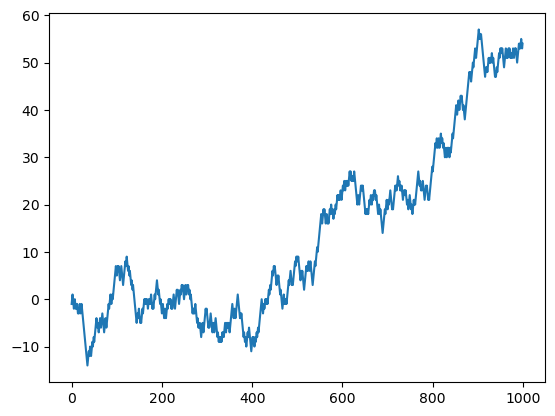

In [116]:
# https://github.com/PacktPublishing/Hands-On-Simulation-Modeling-with-Python/blob/master/Chapter05/RandomWalkSimulation.py
from random import seed
from random import random
from matplotlib import pyplot
seed(1)
RWPath = list()
RWPath.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	ZNValue = -1 if random() < 0.5 else 1
	XNValue = RWPath[i-1] + ZNValue
	RWPath.append(XNValue)
pyplot.plot(RWPath)
pyplot.show()

Weather initial condition = Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Rainy
Rainy
Sunny
Sunny
Rainy
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Rainy
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Rainy


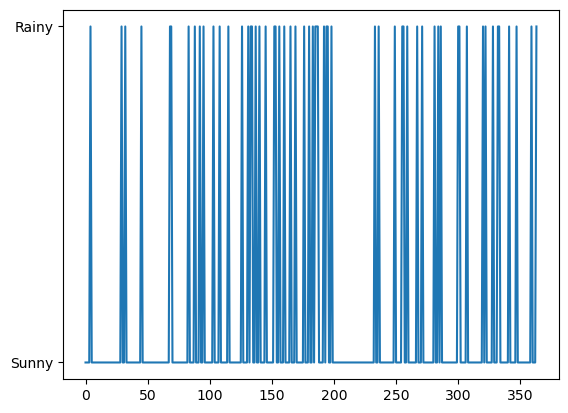

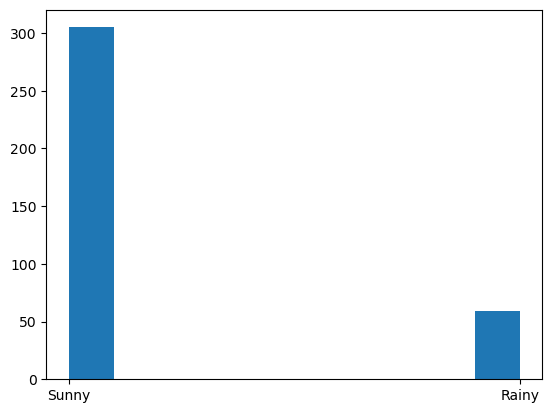

In [117]:
# URL: https://github.com/PacktPublishing/Hands-On-Simulation-Modeling-with-Python/blob/master/Chapter05/WeatherForecast.py
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3)
StatesData = ["Sunny","Rainy"]

TransitionStates = [["SuSu","SuRa"],["RaRa","RaSu"]]
TransitionMatrix = [[0.80,0.20],[0.25,0.75]]


WeatherForecasting = list()
NumDays = 365
TodayPrediction = StatesData[0]

print("Weather initial condition =",TodayPrediction)


for i in range(1, NumDays):
    
    if TodayPrediction == "Sunny":        
        TransCondition = np.random.choice(TransitionStates[0],replace=True,p=TransitionMatrix[0])
        if TransCondition == "SuSu":
            pass
        else:
            TodayPrediction = "Rainy"


            
    elif TodayPrediction == "Rainy":
        TransCondition = np.random.choice(TransitionStates[1],replace=True,p=TransitionMatrix[1])
        if TransCondition == "RaRa":
            pass
        else:
            TodayPrediction = "Sunny"

            
    WeatherForecasting.append(TodayPrediction) 
    print(TodayPrediction)


plt.plot(WeatherForecasting)
plt.show()

plt.figure()
plt.hist(WeatherForecasting)
plt.show()

## Referencias

1. https://www.educative.io/answers/how-to-find-the-coin-toss-probability-in-python
2. https://dlsun.github.io/symbulate/mc.html#poisson
3. https://medium.com/geekculture/how-to-simulate-coin-flips-using-binomial-distribution-in-python-165aae7daf22
4. https://github.com/Apress/python-data-analytics-2e
5. https://github.com/PacktPublishing/Python-Data-Analysis-Third-Edition
6. http://rstudio-pubs-static.s3.amazonaws.com/387683_9fdcc9657bb64526870506a70c966e08.html
7. https://scipy-lectures.org/packages/statistics/index.html
8. https://github.com/PacktPublishing/Python-for-Data-Analysis-step-by-step-with-projects-
9. https://github.com/krzjoa/awesome-python-data-science
9. https://dlsun.github.io/symbulate/index.html
10. https://github.com/PacktPublishing/Hands-On-Simulation-Modeling-with-Python/tree/master/Chapter05